<a href="https://colab.research.google.com/github/Arpitsinghvampire/computer_vision/blob/main/Half_unet_architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#here we will model the half unet architecture
#first we import the necessary dependencies
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import *
from keras.utils import plot_model
from keras.models import Model


In [6]:
#now here we will create the model
inputs1=Input((256,256,1))
conv_1=Conv2D(64,3,activation='relu',padding='same')(inputs1)
conv_2=Conv2D(64,3,activation='relu',padding='same')(conv_1)
maxpool_1=MaxPool2D()(conv_2)

conv_3=Conv2D(64,3,activation='relu',padding='same')(maxpool_1)
conv_4=Conv2D(64,3,activation='relu',padding='same')(conv_3)
maxpool_2=MaxPool2D()(conv_4)

conv_5=Conv2D(64,3,activation='relu',padding='same')(maxpool_2)
conv_6=Conv2D(64,3,activation='relu',padding='same')(conv_5)
maxpool_3=MaxPool2D()(conv_6)

#now here we try to upsample our  image
upsample_1=Conv2DTranspose(64,3,strides=8,padding='same')(maxpool_3)

upsample_2=Conv2DTranspose(64,3,strides=4,padding='same')(maxpool_2)

upsample_3=Conv2DTranspose(64,3,strides=2,padding='same')(maxpool_1)


#now we need to add those output from the layers to the original
add_layer=Add()([upsample_1,upsample_2,upsample_3,conv_2])

#this will give us the added vector for all

conv_7=Conv2D(64,3,activation='relu',padding='same')(add_layer)
outputs1=Conv2D(1,1,activation='relu',padding='same')(conv_7)


model=Model(inputs=inputs1,outputs=outputs1)

model.summary()






Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 256, 256, 1)]        0         []                            
                                                                                                  
 conv2d_6 (Conv2D)           (None, 256, 256, 64)         640       ['input_2[0][0]']             
                                                                                                  
 conv2d_7 (Conv2D)           (None, 256, 256, 64)         36928     ['conv2d_6[0][0]']            
                                                                                                  
 max_pooling2d_3 (MaxPoolin  (None, 128, 128, 64)         0         ['conv2d_7[0][0]']            
 g2D)                                                                                       

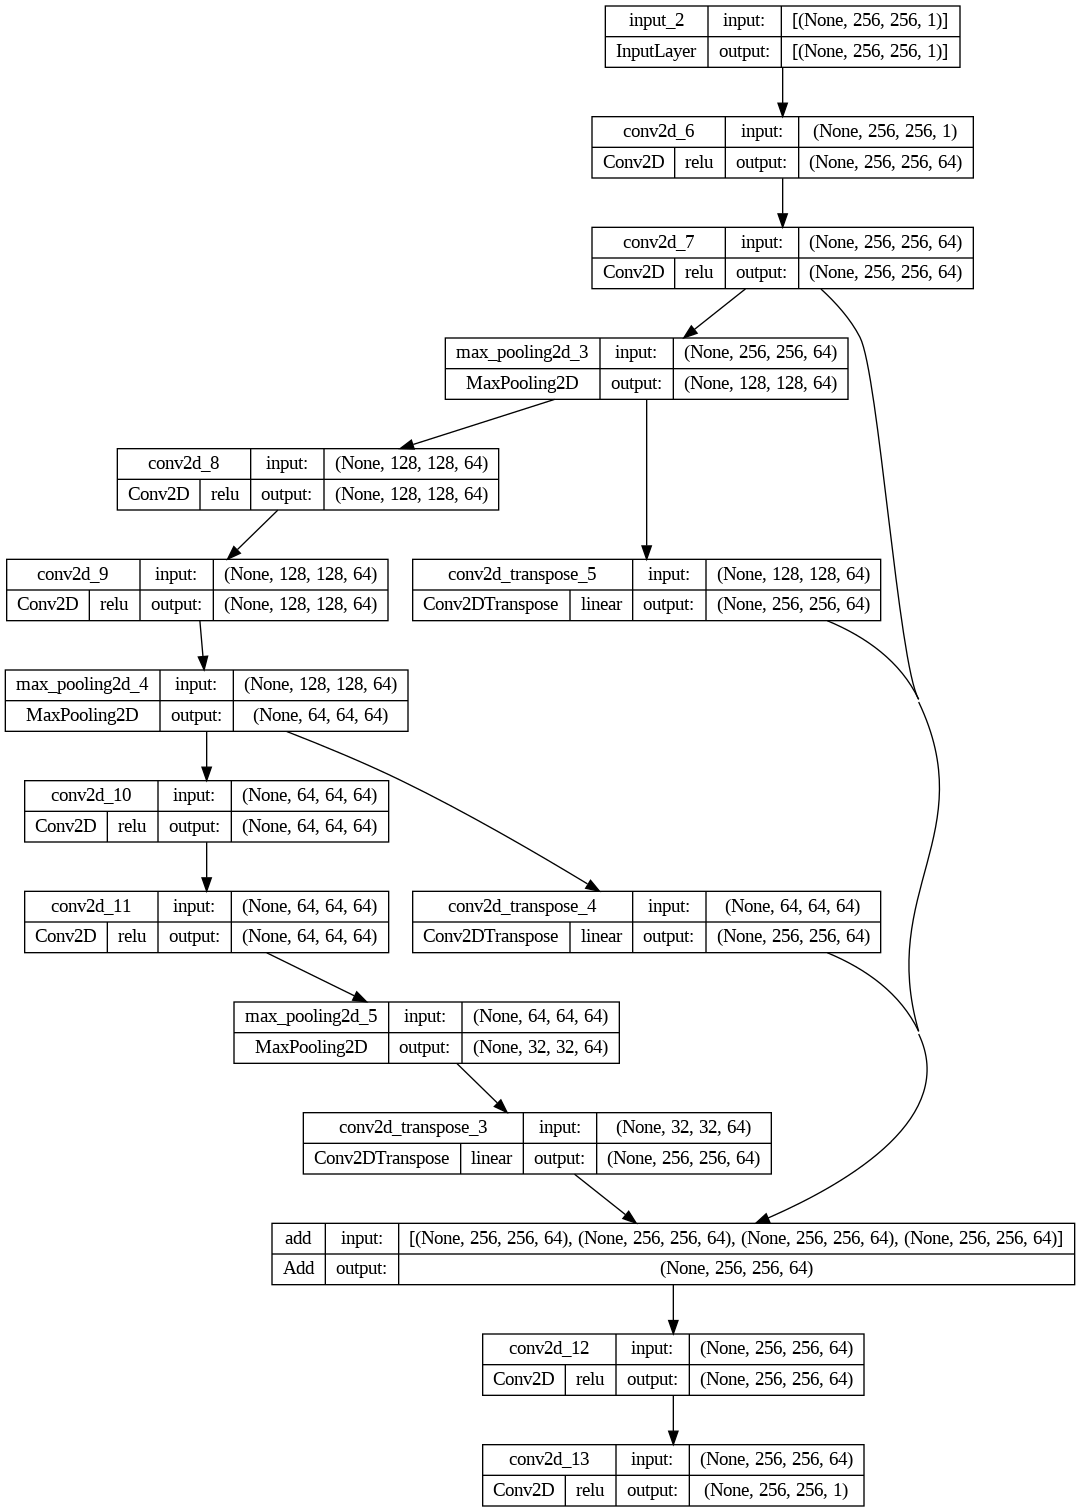

In [8]:
#now lets plot the model
plot_model(model,show_shapes=True,show_layer_names=True,show_layer_activations=True)
